In [1]:
import pandas as pd
import numpy as np

In [2]:
Column_names=['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','Target']

In [3]:
df = pd.read_csv('./kddcup.data.corrected.csv',names=Column_names)

In [4]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Target
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [5]:
df['T1'] = 1
df['T1'].loc[df.Target != 'normal.'] = 0

C:\Users\SaiRamMaganti\AppData\Local\Temp\ipykernel_11576\1679889257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['T1'].loc[df.Target != 'normal.'] = 0


In [6]:
data = df.drop(['T1'], axis=1)

In [7]:
labels=data['service'].unique()
values=[]
for i in labels:
    values.append(len(data.loc[(data['service']==i)]))

ar=sorted(list(zip(values,labels)),reverse=True)
for i in ar:
    print("{} : {}".format(i[1],i[0]),end=",")

ecr_i : 2811660,private : 1100831,http : 623091,smtp : 96554,other : 72653,domain_u : 57782,ftp_data : 40697,eco_i : 16338,finger : 6891,urp_i : 5378,ftp : 5214,telnet : 4277,ntp_u : 3833,auth : 3382,pop_3 : 1981,time : 1579,domain : 1113,Z39_50 : 1078,gopher : 1077,mtp : 1076,ssh : 1075,whois : 1073,remote_job : 1073,rje : 1070,link : 1069,imap4 : 1069,ctf : 1068,name : 1067,supdup : 1060,nntp : 1059,echo : 1059,discard : 1059,uucp_path : 1057,systat : 1056,sunrpc : 1056,netstat : 1056,daytime : 1056,pop_2 : 1055,netbios_ssn : 1055,netbios_ns : 1054,vmnet : 1053,sql_net : 1052,netbios_dgm : 1052,iso_tsap : 1052,shell : 1051,csnet_ns : 1051,klogin : 1050,hostnames : 1050,bgp : 1047,printer : 1045,login : 1045,exec : 1045,http_443 : 1044,efs : 1042,uucp : 1041,ldap : 1041,kshell : 1040,nnsp : 1038,courier : 1021,IRC : 521,urh_i : 148,X11 : 135,tim_i : 12,red_i : 9,pm_dump : 5,tftp_u : 3,http_8001 : 2,harvest : 2,aol : 2,http_2784 : 1,

In [8]:
ser_c=[]
for i in ar[11:]:
    ser_c.append(i[1])
data['service']=data['service'].replace(ser_c,'cc')

In [9]:
data['Target']=df['T1']

In [10]:
data.shape

(4898431, 42)

In [11]:
data.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [12]:
class_1=data[data['Target']==1]

In [13]:
class_0=data[data['Target']==0]

In [14]:
class1_len=len(class_1)

In [15]:
class1_len

972781

In [16]:
df_class0=class_0.sample(class1_len)

In [17]:
df_balance=pd.concat([df_class0,class_1],axis=0)

In [18]:
balance_data=df_balance.sample(frac=1).reset_index()

In [19]:
balance_data['Target'].value_counts()

1    972781
0    972781
Name: Target, dtype: int64

In [27]:
balance_data.to_csv('balance_data.csv')

In [20]:
data_temp = balance_data.drop(['service','protocol_type','flag','Target'],axis=1)

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

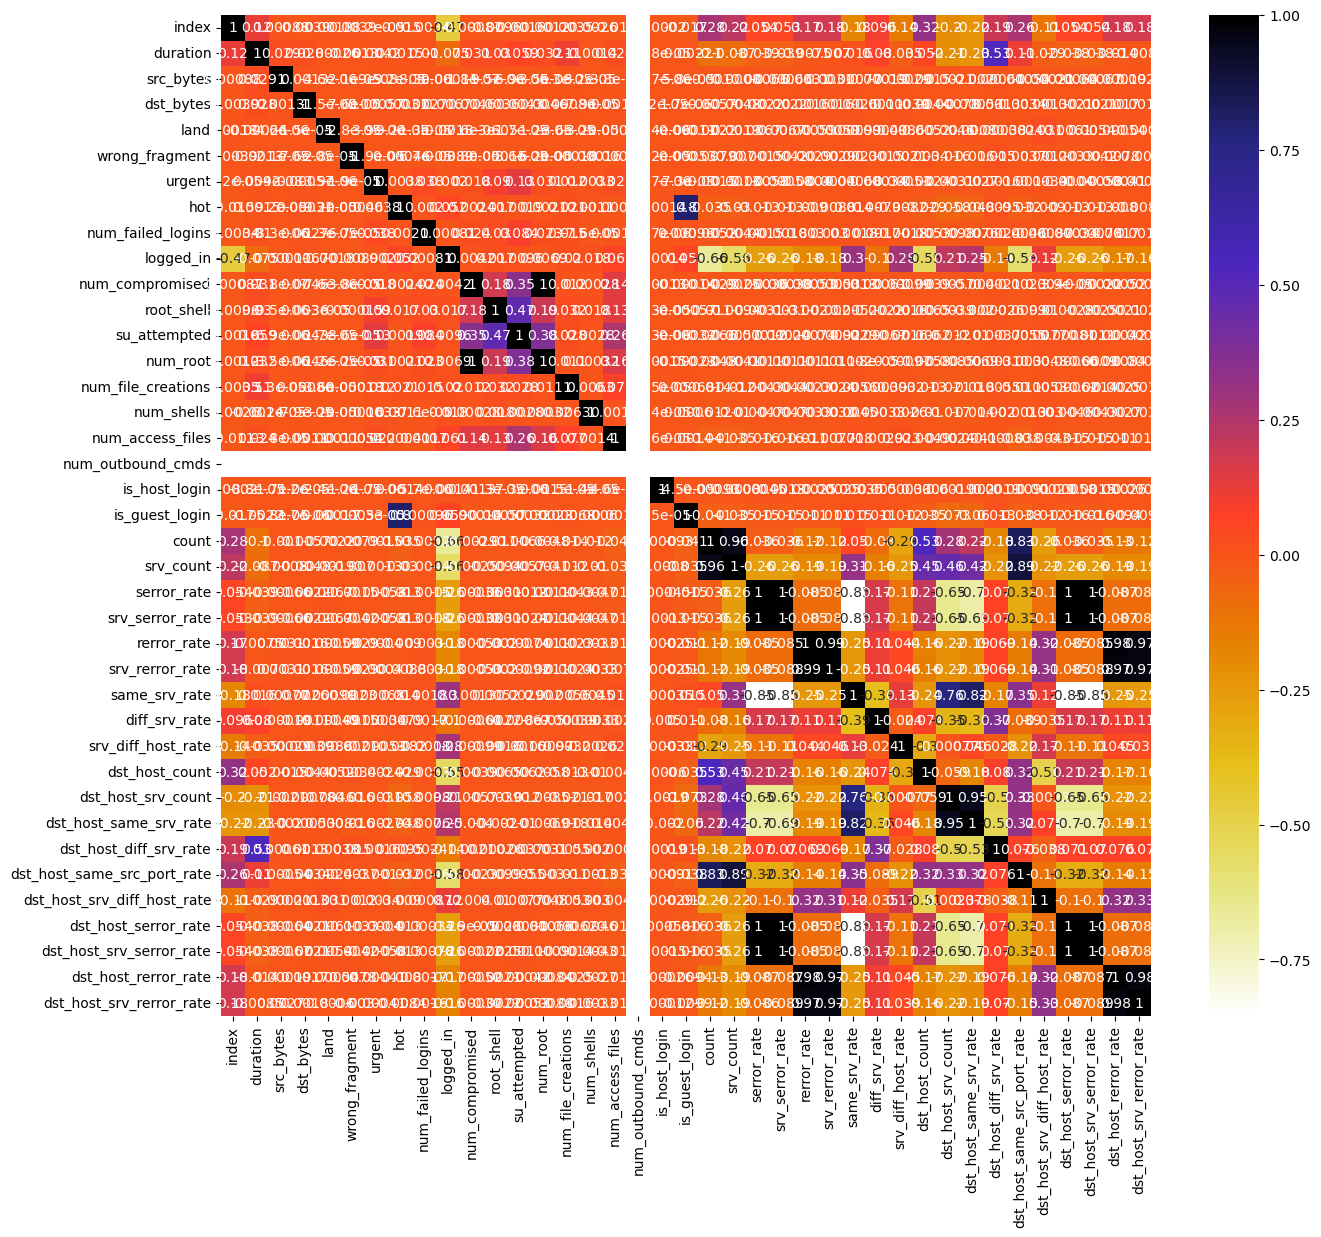

In [22]:
plt.figure(figsize=(15,13))
cor=data_temp.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [23]:
cor_col=set()
for i in range(len(cor.columns)):
    for j in range(i):
        if (cor.iloc[i,j])>0.75:
            temp=cor.columns[i]
            cor_col.add(temp)

In [24]:
print(cor_col)
print(len(cor_col))

{'is_guest_login', 'dst_host_srv_count', 'dst_host_serror_rate', 'dst_host_rerror_rate', 'num_root', 'srv_serror_rate', 'dst_host_same_srv_rate', 'dst_host_srv_rerror_rate', 'dst_host_srv_serror_rate', 'srv_count', 'dst_host_same_src_port_rate', 'srv_rerror_rate'}
12


In [25]:
data_temp.shape

(1945562, 39)

In [26]:
data_temp = data_temp.drop(list(cor_col),axis=1)

In [27]:
data_temp.shape

(1945562, 27)

In [28]:
data_temp['service']=balance_data['service']
data_temp['protocol_type']=balance_data['protocol_type']
data_temp['flag']=balance_data['flag']
data_temp['Target']=balance_data['Target']

In [29]:
features=data_temp.columns

In [30]:
print(features)

Index(['index', 'duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login', 'count',
       'serror_rate', 'rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_diff_srv_rate',
       'dst_host_srv_diff_host_rate', 'service', 'protocol_type', 'flag',
       'Target'],
      dtype='object')


In [31]:
data_enc = pd.get_dummies(data_temp, drop_first=True)

In [32]:
data_enc.head()

,index,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,4491701,0,105,146,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,893443,0,176,10478,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,744552,0,301,1380,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,3087923,0,1032,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2888707,0,1032,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [34]:
x1 = data_enc.drop('Target', axis = 1).values
y1 = data_enc['Target']

In [35]:
y1 = y1.astype(int)

print(x1.shape)
print(y1.shape)

(1945562, 50)
(1945562,)


In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dt1=DecisionTreeClassifier(random_state=20,criterion='entropy',max_depth=12)
dt1.fit(x1,y1)

DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=20)

In [38]:
col = []
f = []

for i,column in enumerate(data_enc.drop('Target', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt1.feature_importances_[i]))
    
    col.append(column)
    f.append(dt1.feature_importances_[i])

The feature importance for index is : 0.0007395798560668809
The feature importance for duration is : 0.00010230786124391806
The feature importance for src_bytes is : 0.02588561021302808
The feature importance for dst_bytes is : 0.037469425144762675
The feature importance for land is : 0.0
The feature importance for wrong_fragment is : 0.0
The feature importance for urgent is : 6.928264368085057e-06
The feature importance for hot is : 0.00048159530726191917
The feature importance for num_failed_logins is : 0.0
The feature importance for logged_in is : 0.00015421410787318148
The feature importance for num_compromised is : 0.0021644201355962038
The feature importance for root_shell is : 6.647887826427173e-06
The feature importance for su_attempted is : 0.0
The feature importance for num_file_creations is : 2.018240380736431e-05
The feature importance for num_shells is : 6.573610940050233e-06
The feature importance for num_access_files is : 2.1295052180676807e-06
The feature importance for

In [39]:
f_df = zip(col, f)
f_df = pd.DataFrame(f_df, columns = ['Feature','Feature Importance'])

f_df = f_df.sort_values('Feature Importance', ascending = False).reset_index()

In [40]:
f_df

,index,Feature,Feature Importance
0,18,count,0.913235
1,3,dst_bytes,0.037469
2,2,src_bytes,0.025886
3,33,service_http,0.014224
4,10,num_compromised,0.002164
5,32,service_ftp_data,0.001466
6,19,serror_rate,0.000961
7,0,index,0.000740
8,29,service_ecr_i,0.000721
9,7,hot,0.000482


In [41]:
imp_columns = f_df['Feature'][0:30]

In [42]:
data_enc1=data_enc[imp_columns]

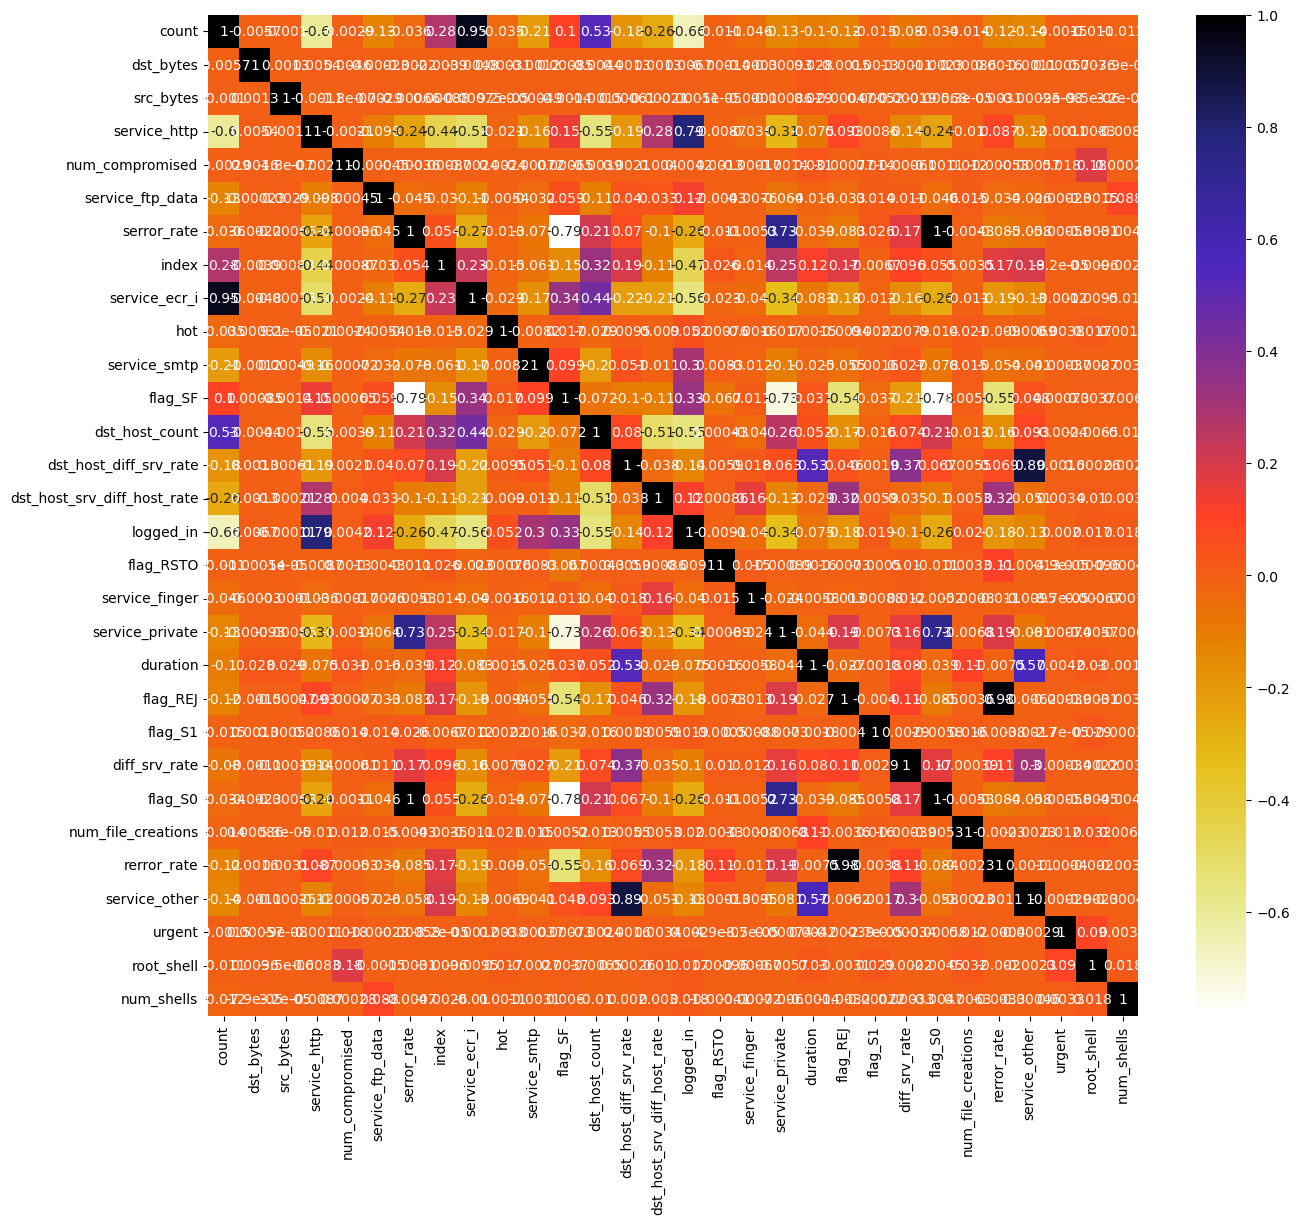

In [43]:
plt.figure(figsize=(15,13))
cor1=data_enc1.corr()
sns.heatmap(cor1,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [44]:
cor1_col=set()
for i in range(len(cor1.columns)):
    for j in range(i):
        if (cor1.iloc[i,j])>0.75:
            temp=cor1.columns[i]
            cor1_col.add(temp)

In [45]:
print(cor1_col)
print(len(cor1_col))

{'logged_in', 'service_ecr_i', 'service_other', 'rerror_rate', 'flag_S0'}
5


In [46]:
data_enc1.shape

(1945562, 30)

In [47]:
data_enc1 = data_enc1.drop(list(cor1_col),axis=1)

In [48]:
data_enc1['Target']=data_enc['Target']

In [49]:
data_enc1.shape

(1945562, 26)

In [78]:
data_enc1.to_csv('enc_bal_final.csv')

In [50]:
data_enc1

,count,dst_bytes,src_bytes,service_http,num_compromised,service_ftp_data,serror_rate,index,hot,service_smtp,...,service_private,duration,flag_REJ,flag_S1,diff_srv_rate,num_file_creations,urgent,root_shell,num_shells,Target
0,1,146,105,0,0,0,0.0,4491701,0,0,...,1,0,0,0,0.00,0,0,0,0,1
1,7,10478,176,1,0,0,0.0,893443,0,0,...,0,0,0,0,0.00,0,0,0,0,1
2,4,1380,301,1,0,0,0.0,744552,0,0,...,0,0,0,0,0.00,0,0,0,0,1
3,511,0,1032,0,0,0,0.0,3087923,0,0,...,0,0,0,0,0.00,0,0,0,0,0
4,511,0,1032,0,0,0,0.0,2888707,0,0,...,0,0,0,0,0.00,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945557,22,5665,318,1,0,0,0.0,351897,0,0,...,0,0,0,0,0.00,0,0,0,0,1
1945558,297,0,0,0,0,0,0.0,4752660,0,0,...,1,0,1,0,0.06,0,0,0,0,0
1945559,511,0,1032,0,0,0,0.0,2846486,0,0,...,0,0,0,0,0.00,0,0,0,0,0
1945560,511,0,1032,0,0,0,0.0,3267352,0,0,...,0,0,0,0,0.00,0,0,0,0,0


In [51]:
x=data_enc1.drop(['Target'],axis=1)
y=data_enc1['Target']

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=1)  

In [61]:
from sklearn.ensemble import RandomForestClassifier

RD_clf = RandomForestClassifier(criterion='gini')
RD_clf.fit(x_train, y_train)

RandomForestClassifier()

In [62]:
y_pred= RD_clf.predict(x_test)
print(accuracy_score(y_test,y_pred), f1_score(y_test,y_pred,average='macro'))

0.958687557952347 0.9586873135632282


In [63]:
from sklearn.ensemble import GradientBoostingClassifier

GD_clf = GradientBoostingClassifier(learning_rate = 0.01)
GD_clf.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.01)

In [64]:
y_pred= GD_clf.predict(x_test)
print(accuracy_score(y_test,y_pred), f1_score(y_test,y_pred,average='macro'))

0.8748373222366368 0.874824778502026


In [65]:
from sklearn.tree import DecisionTreeClassifier  

DT_clf= DecisionTreeClassifier(criterion='entropy')
DT_clf.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy')

In [66]:
y_pred= DT_clf.predict(x_test)
print(accuracy_score(y_test,y_pred), f1_score(y_test,y_pred,average='macro'))

0.9349864615093618 0.934986454561886


In [58]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x_train, y_train)

LogisticRegression()

In [59]:
y_pred= clf.predict(x_test)
print(accuracy_score(y_test,y_pred), f1_score(y_test,y_pred,average='macro'))

0.8430480827153463 0.8428431743966025
